In [1]:
#Imports

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'Insulin'),
  Text(5, 0, 'BMI'),
  Text(6, 0, 'DiabetesPedigreeFunction'),
  Text(7, 0, 'Age')])

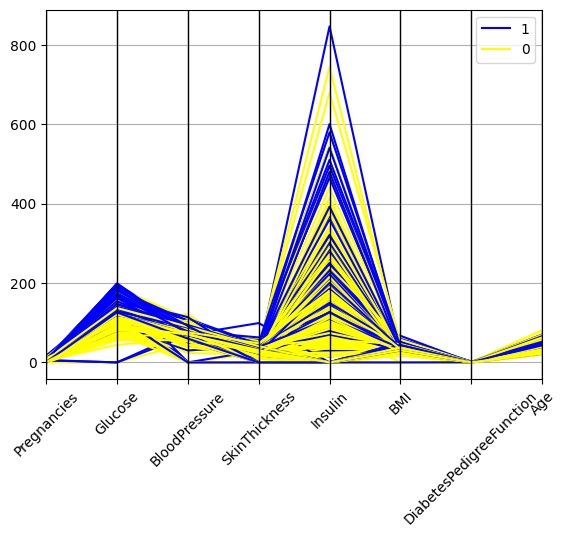

In [4]:
pd.plotting.parallel_coordinates(df,"Outcome", color=("blue", "yellow"))
plt.xticks(rotation=45)

In [5]:
#Dividing the sample

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [6]:
#Fitting the model

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

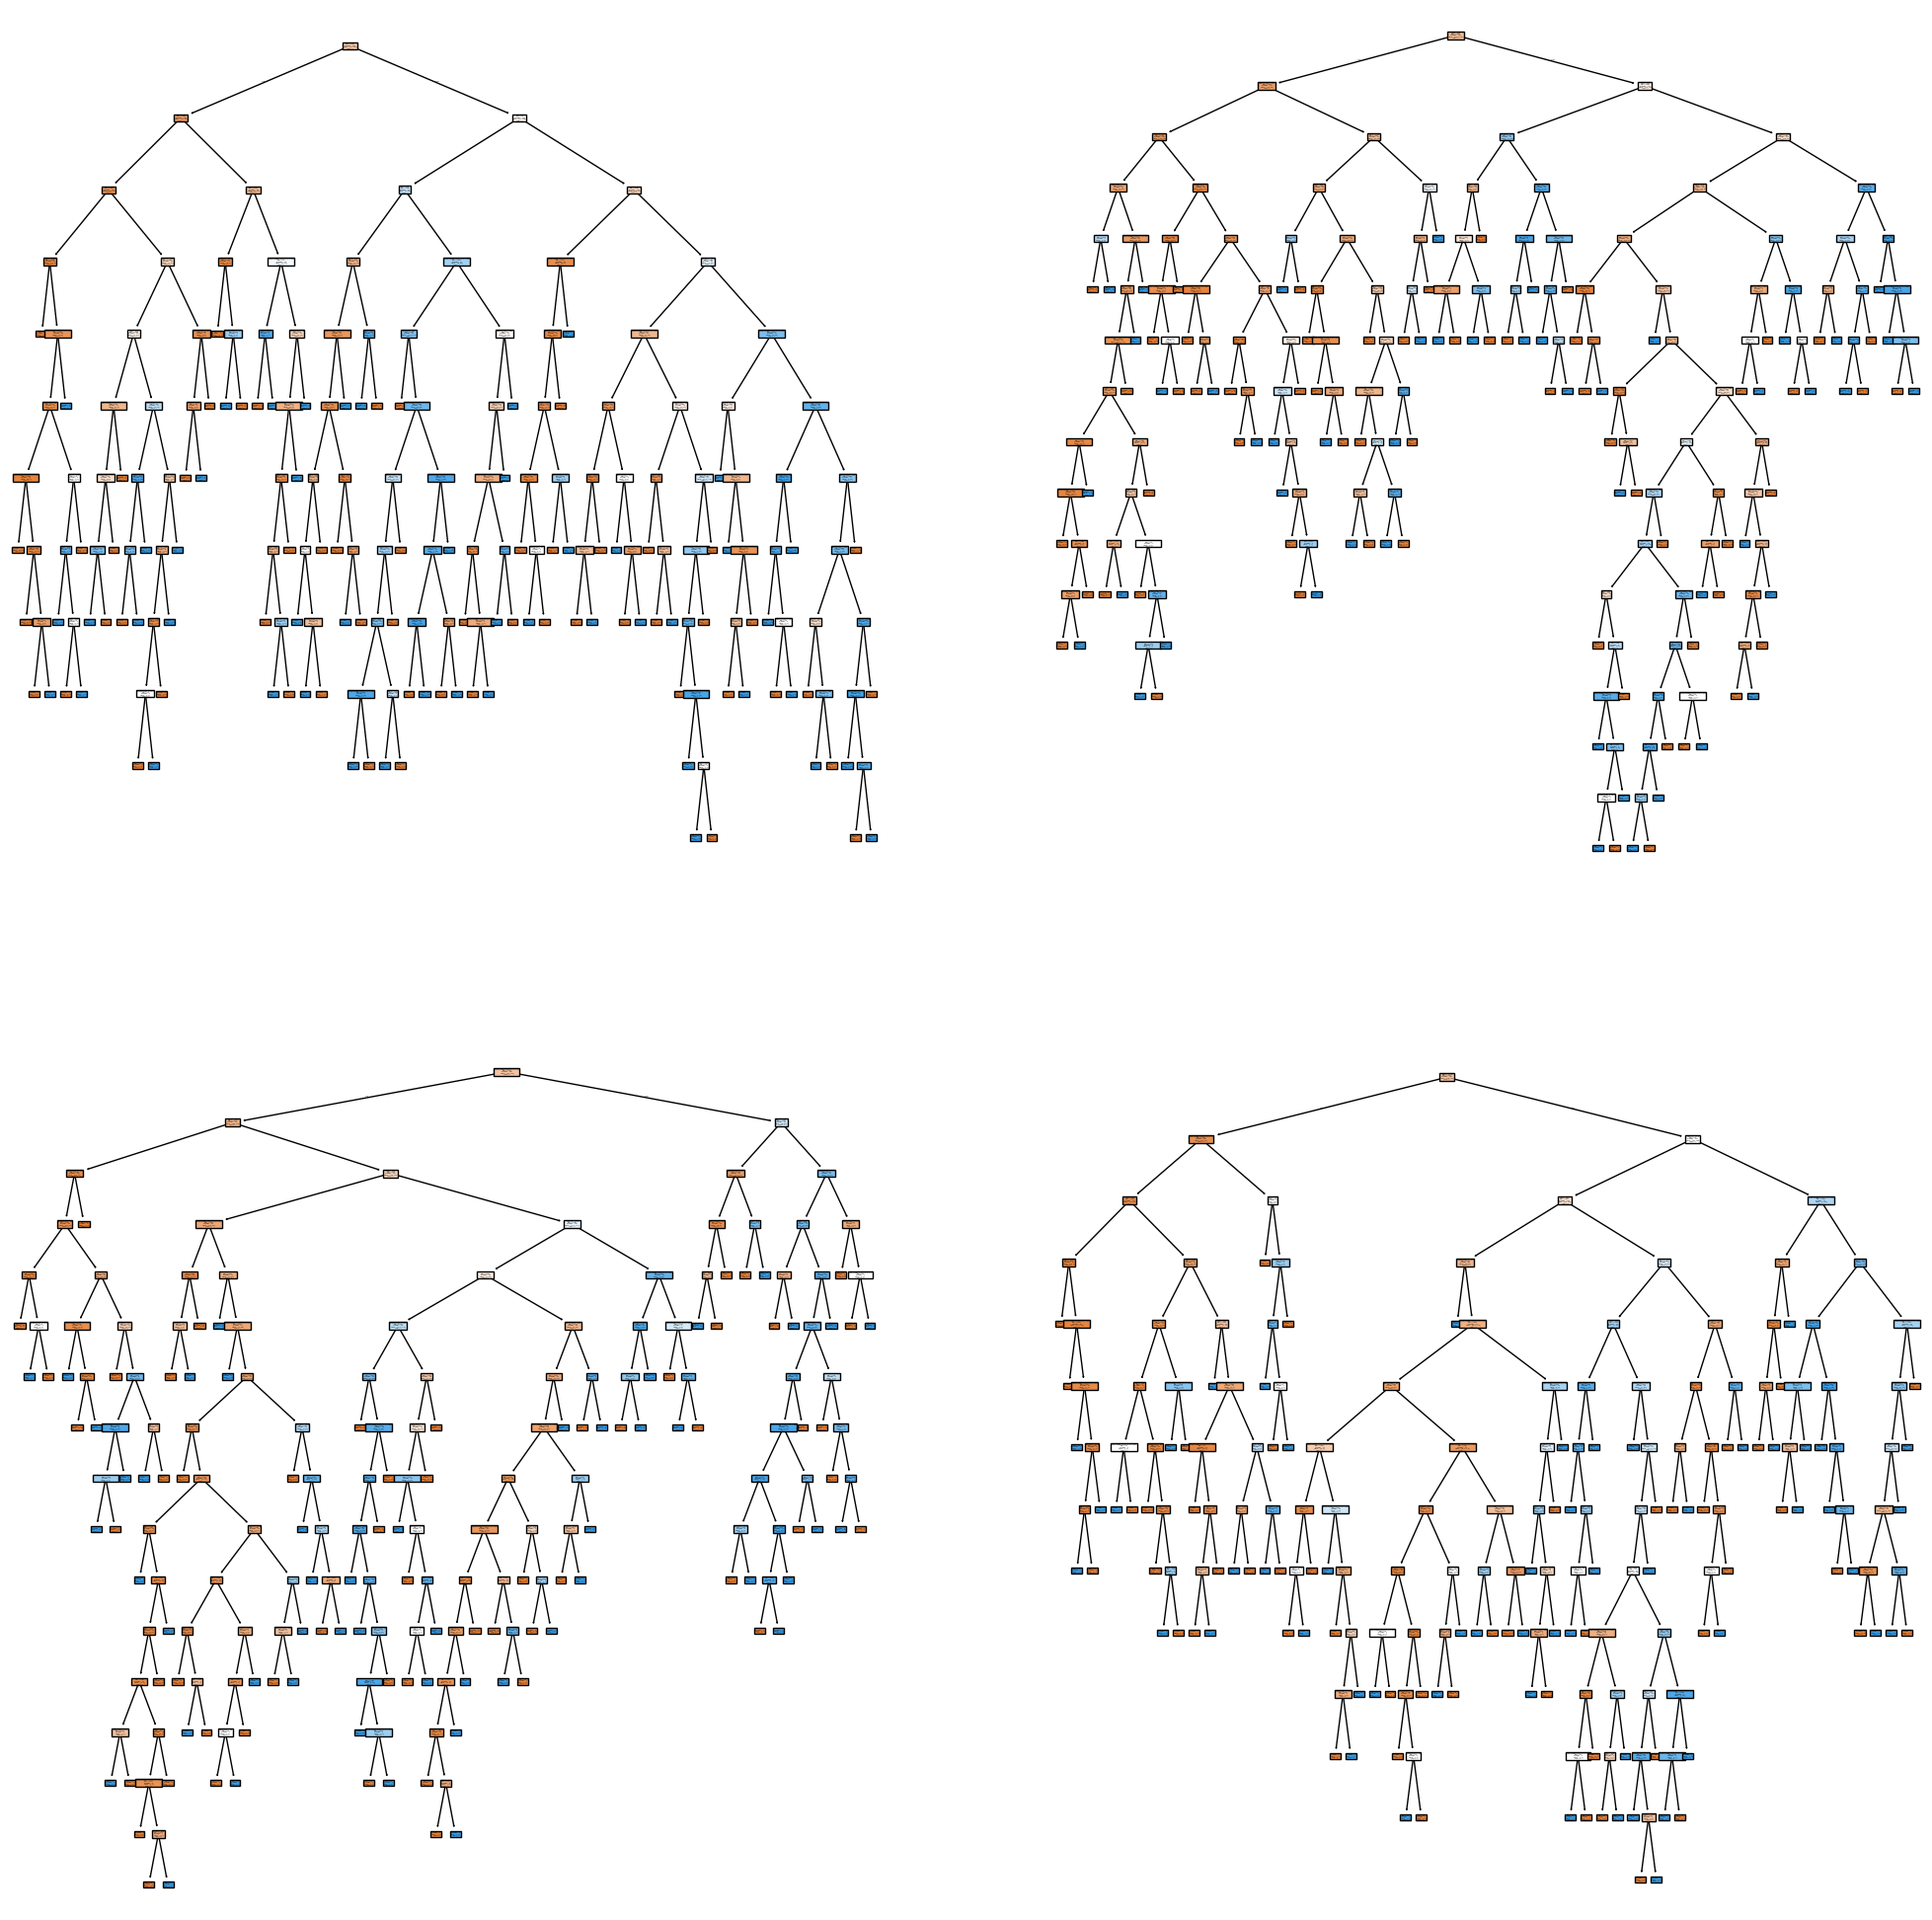

In [7]:
#Showiing the first 4/100 generated trees (default)

fig, axis = plt.subplots(2, 2, figsize = (25, 25))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [8]:
#Predicting the outcome

y_pred = model.predict(X_test)

In [9]:
print(f"The accuracy for the model is {round(accuracy_score(y_test, y_pred),3)}%")

print(f"The F1 score for the model is {round(f1_score(y_test, y_pred),3)}%")

The accuracy for the model is 0.721%
The F1 score for the model is 0.613%


In [10]:
#Random Search HyperParameters
parameters = {
              'n_estimators':[20,50,100,120,150],
              'max_depth':[4,5,6,7],
              'min_samples_leaf':[1,2,3,4,5],
              'min_samples_split':[2,3,4,5],
              'max_features':[3,4,5,6,7,8]
             }
scorer = make_scorer(f1_score)

In [11]:
random = RandomizedSearchCV(model, parameters, scoring=scorer)
random

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_features': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [20, 50, 100, 120,
                                                         150]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [12]:
#Fiting the model
random_out = random.fit(X_train, y_train)
random_out

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [4, 5, 6, 7],
                                        'max_features': [3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [20, 50, 100, 120,
                                                         150]},
                   scoring=make_scorer(f1_score, response_method='predict'))

In [13]:
#Best estimator after fitting the model

best = random_out.best_estimator_
best

RandomForestClassifier(max_depth=6, max_features=5, min_samples_split=5,
                       n_estimators=150, random_state=42)

In [14]:
best_train_pred = best.predict(X_train)
best_test_pred  = best.predict(X_test)

In [15]:
print(f"The F1 score for the training DS is: {f1_score(best_train_pred,y_train)}")
print(f"The F1 score for the testing DS is: {f1_score(best_test_pred,y_test)}")

The F1 score for the training DS is: 0.8753056234718827
The F1 score for the testing DS is: 0.6782608695652174


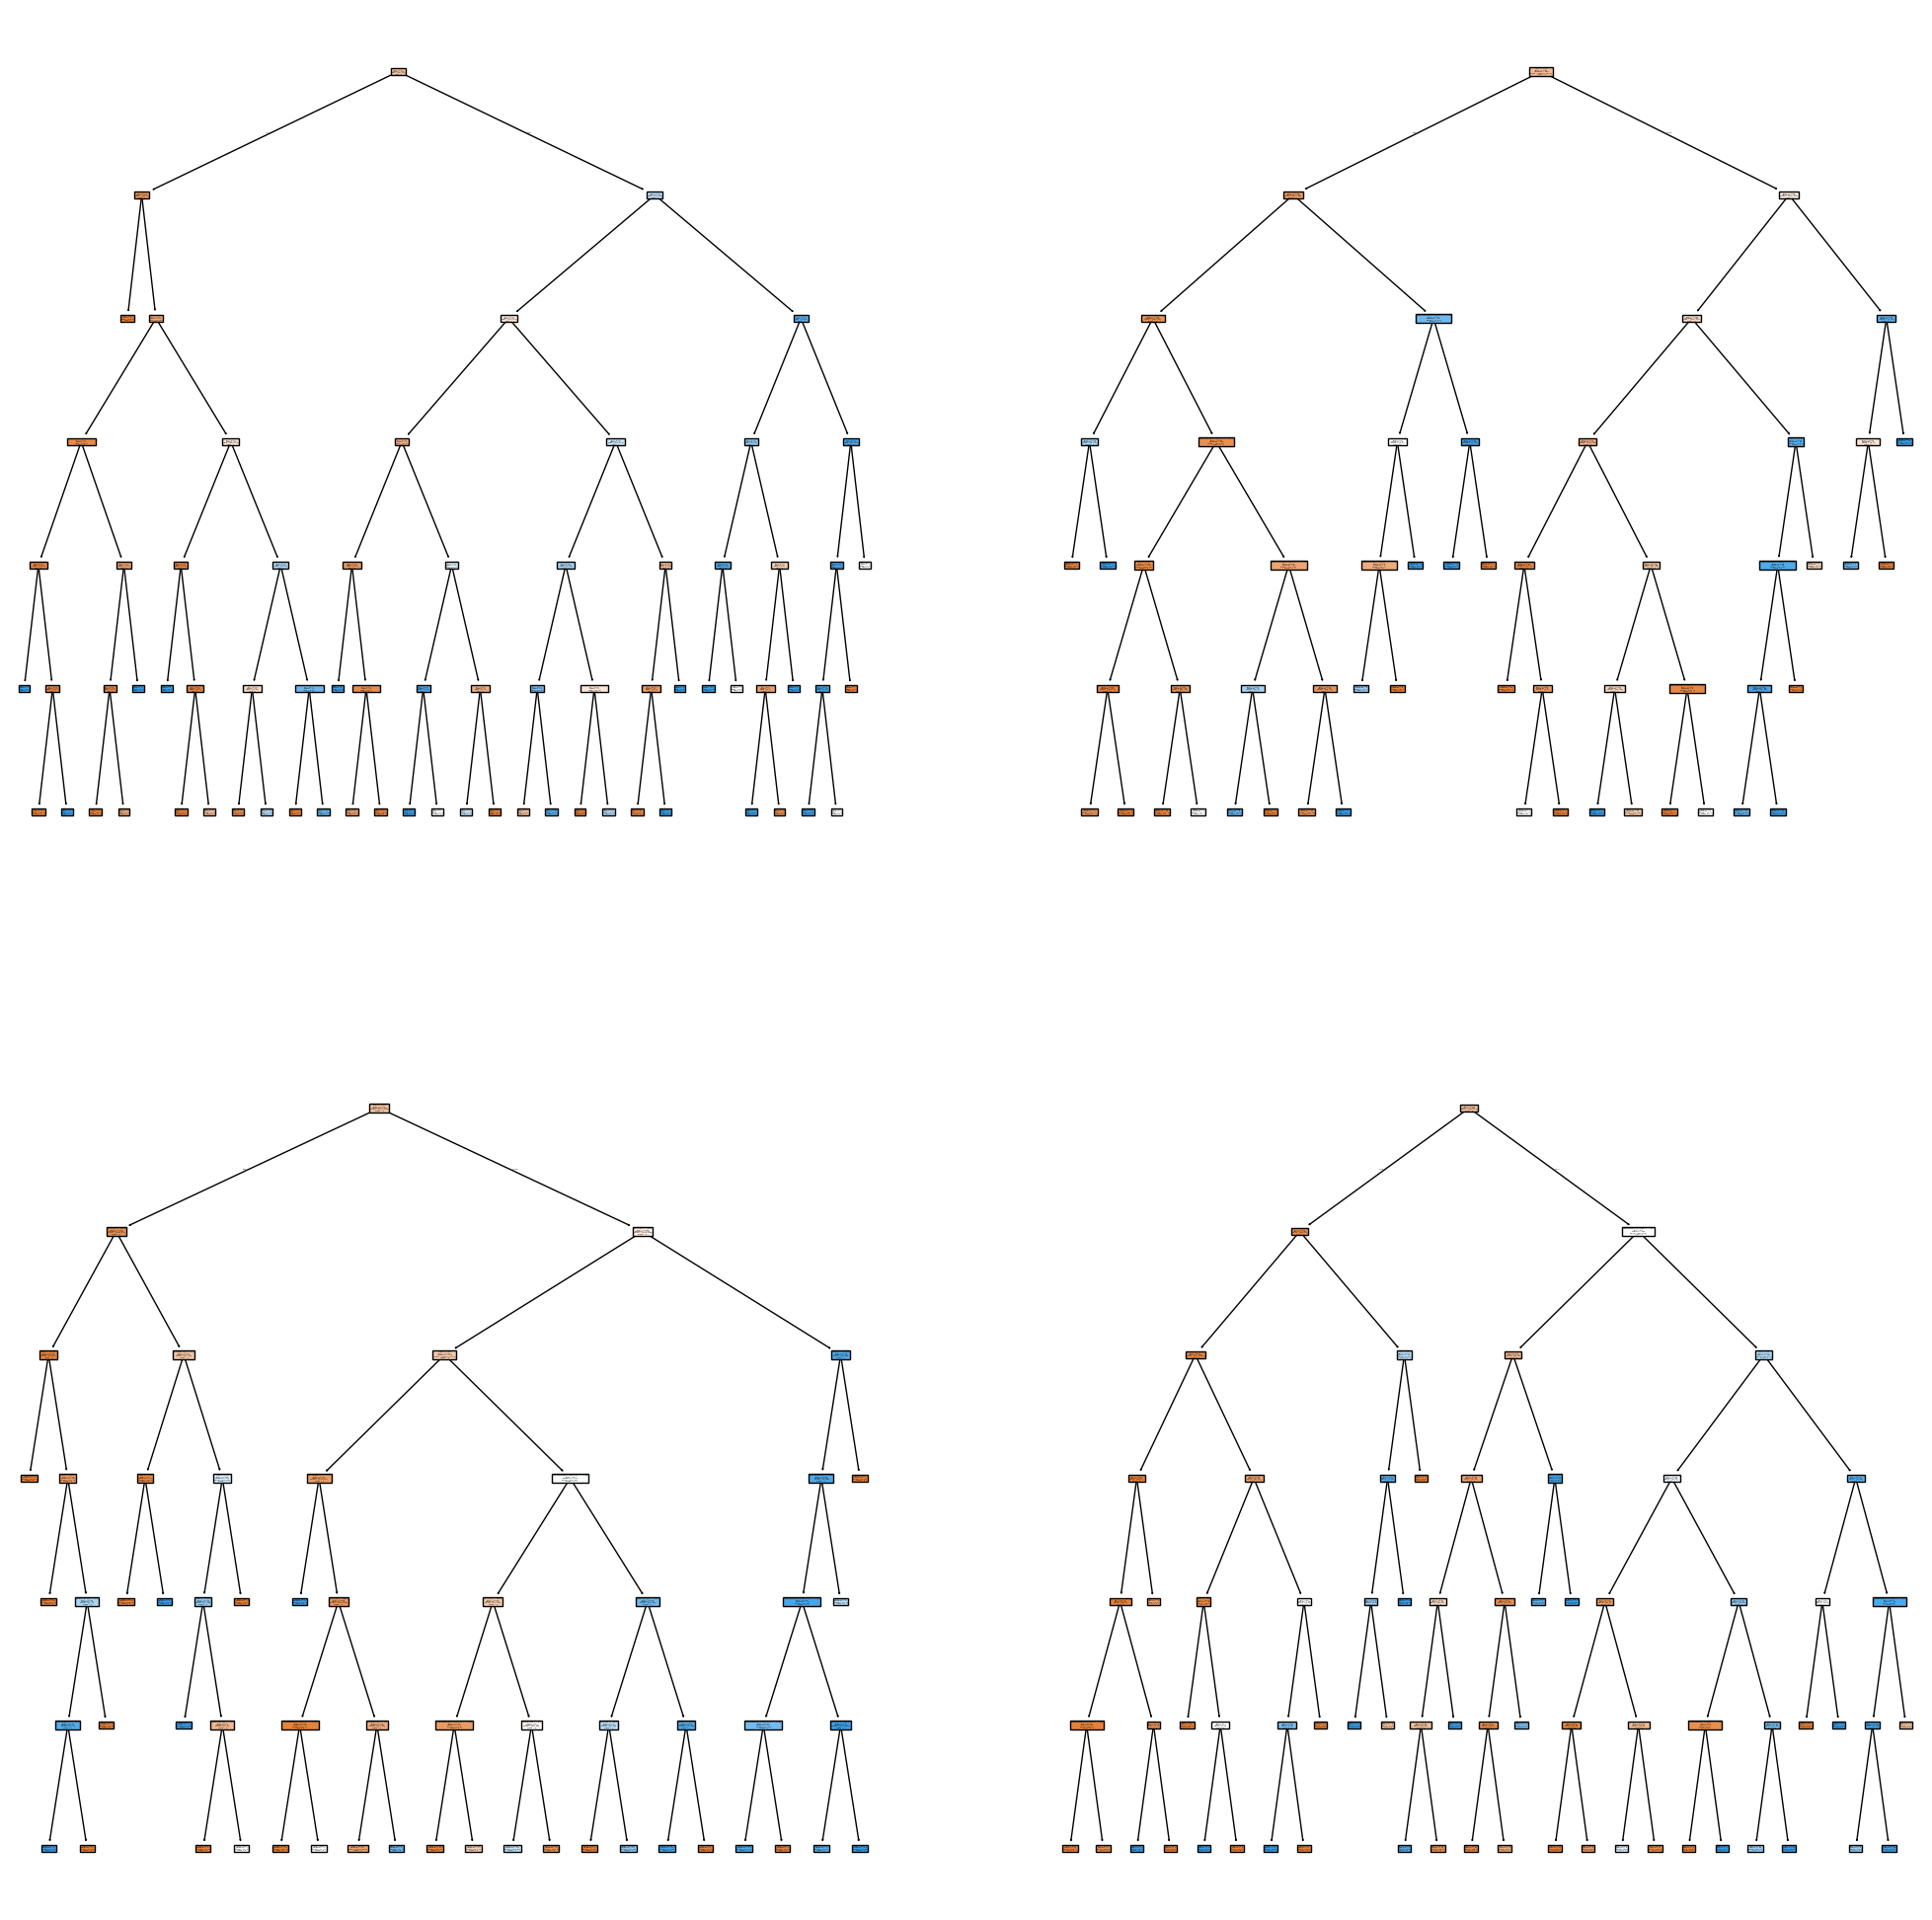

In [16]:
#Now, lets plot again with the new model

fig, axis = plt.subplots(2, 2, figsize = (25, 25))

tree.plot_tree(best.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)
tree.plot_tree(best.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()